In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la

In [63]:
sizes = [20,20]
p, q = 0.8, 0.2
probs = [[p, q], [q, p]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
pos = nx.spring_layout(G, seed=0)

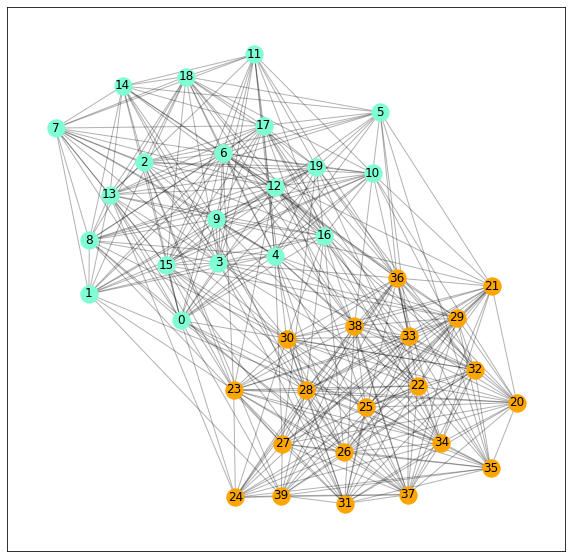

In [64]:
# Plot graph
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(range(20), pos, node_color='aquamarine')
nx.draw_networkx_nodes(range(20,40), pos, node_color='orange')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()

In [73]:
# Get Adjacency Matrix
A = nx.adjacency_matrix(G).todense()
A = np.array(A)

<ipython-input-73-fe0ca96e5780>:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


In [66]:
# define M
M = A - (p+q) / 2 * np.ones((40,40)) - p * np.eye(40)

# get the leading eigenvector
eigvals, eigvecs = np.linalg.eig(M)
leading_eigvec = eigvecs[:, 0]

In [67]:
leading_eigvec

array([-0.10430201, -0.14665696, -0.15684866, -0.148169  , -0.08294298,
       -0.10233172, -0.17420647, -0.22132117, -0.16244942, -0.15939122,
       -0.10899867, -0.16673839, -0.11381127, -0.20133096, -0.18587153,
       -0.12504019, -0.08759211, -0.17772523, -0.21765058, -0.16025109,
        0.20945734,  0.14203171,  0.18534778,  0.1335954 ,  0.16392122,
        0.10654508,  0.16734306,  0.16085389,  0.18285309,  0.14668154,
        0.12751267,  0.16584503,  0.15150189,  0.16003915,  0.16969697,
        0.18510644,  0.12769879,  0.20372017,  0.15294653,  0.1304846 ])

In [71]:
group_1 = np.where(leading_eigvec > 0)
group_2 = np.where(leading_eigvec < 0)